In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns,na_values=' ?', skipinitialspace=True)




In [ ]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Linear Regression Performance:
MAE: 7.79, MSE: 125.47, R² Score: 0.19
Logistic Regression Performance:
Accuracy: 0.85, Precision: 0.73, Recall: 0.59, F1-Score: 0.65, AUC: 0.90


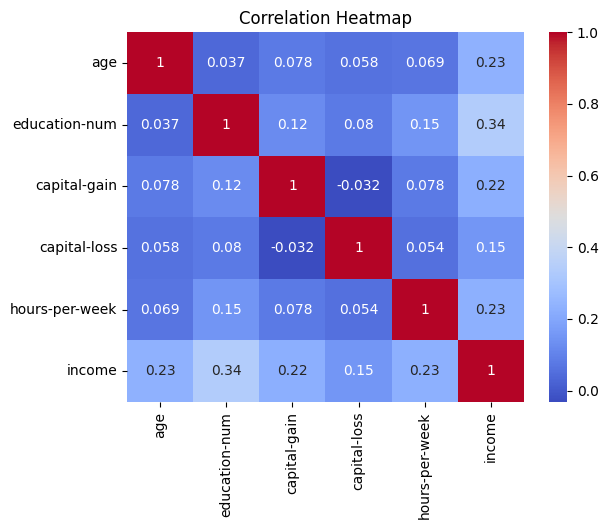

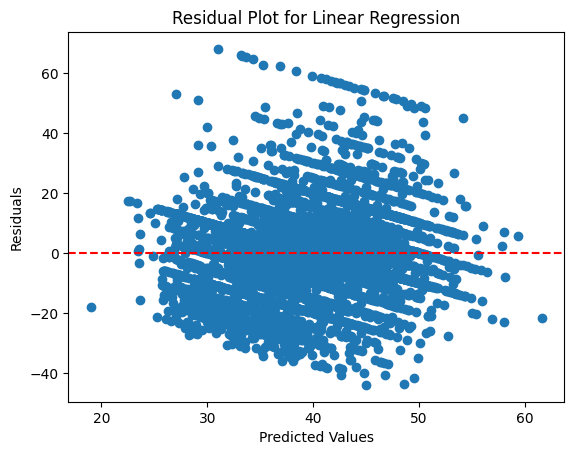

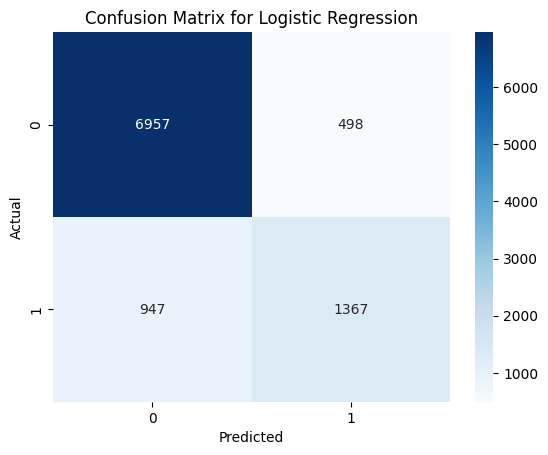

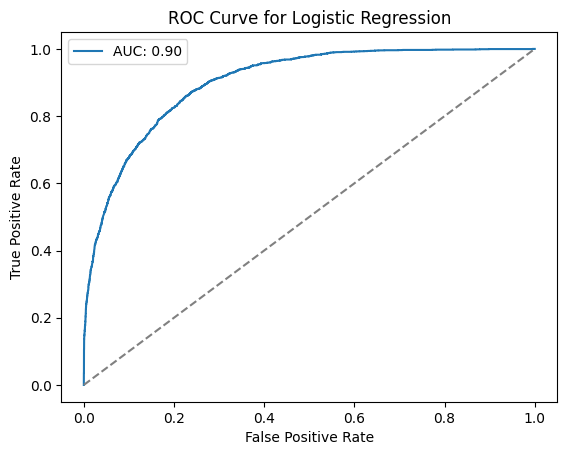

In [24]:
# Data Preprocessing
data.dropna(inplace=True)
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Define features
cat_features = ['workclass', 'education', 'marital-status', 'occupation',
                'relationship', 'race', 'sex', 'native-country']
num_features = ['age', 'education-num', 'capital-gain', 'capital-loss']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Targets
y_linear = data['hours-per-week']
y_logistic = data['income']
X = data.drop(columns=['hours-per-week', 'income'])

# Split Data
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X, y_linear, test_size=0.3, random_state=42)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_logistic, test_size=0.3, random_state=42)

# Linear Regression Model
lin_model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
lin_model.fit(X_train_lin, y_train_lin)
y_pred_lin = lin_model.predict(X_test_lin)

# Metrics for Linear Regression
mae = mean_absolute_error(y_test_lin, y_pred_lin)
mse = mean_squared_error(y_test_lin, y_pred_lin)
r2 = r2_score(y_test_lin, y_pred_lin)

print("Linear Regression Performance:")
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R² Score: {r2:.2f}")

# Logistic Regression Model
log_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])
log_model.fit(X_train_log, y_train_log)
y_pred_log = log_model.predict(X_test_log)
y_pred_proba = log_model.predict_proba(X_test_log)[:, 1]

# Metrics for Logistic Regression
accuracy = accuracy_score(y_test_log, y_pred_log)
precision = precision_score(y_test_log, y_pred_log)
recall = recall_score(y_test_log, y_pred_log)
f1 = f1_score(y_test_log, y_pred_log)
auc = roc_auc_score(y_test_log, y_pred_proba)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, AUC: {auc:.2f}")

# Visualizations
# Heatmap
corr = data[num_features + ['hours-per-week', 'income']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Residual Plot for Linear Regression
residuals = y_test_lin - y_pred_lin
plt.scatter(y_pred_lin, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot for Linear Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test_log, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_log, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC: {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve for Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
